In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Define la arquitectura del modelo
class CustomNet(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 8, 3),
            nn.Conv2d(8, 16, 3),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(16, 32, 5),
            nn.Conv2d(32, 32, 3),
            nn.MaxPool2d(4),
            nn.ReLU()
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.Conv2d(64, 64, 5),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(64, 128, 5),
            nn.Conv2d(128, 128, 3),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.Lin1 = nn.Sequential(nn.Linear(512, 8), nn.Sigmoid())

    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Lin1(x)
        return x

In [3]:
file = 'models/CustomNet -- correct.pth'

In [4]:
# load the model
loaded_model = CustomNet()

In [5]:
# Load custom dict_status
custom_state_dict = torch.load(file, map_location=torch.device('cpu'))
adjusted_state_dict = {}

for key, value in custom_state_dict['model'].items():
    adjusted_key = key.replace("model.", "")  # Ajusta según sea necesario
    adjusted_state_dict[adjusted_key] = value

In [6]:
# Load the adjusted dict_status into the model
loaded_model.load_state_dict(adjusted_state_dict)

<All keys matched successfully>

In [7]:
loaded_model.eval()

CustomNet(
  (ConvLayer1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): 

### These are our labes
<li> 0 : Atelectasis
<li> 1 : Effusion
<li> 2 : Infiltration
<li> 3 : Mass
<li> 4 : No Finding
<li> 5 : Nodule
<li> 6 : Pneumonia
<li> 7 : Pneumothorax

In [8]:
categories = ['Atelectasis',
'Effusion',
'Infiltration',
'Mass',
'No Finding',
'Nodule',
'Pneumonia',
'Pneumothorax']

In [9]:
# Create a dictionary that associates numeric classes with categories
class_dict = {i + 1: category for i, category in enumerate(categories)}

In [10]:
# def load_and_process_image(image_path, model, class_dict, image_size=224):
#     # Upload image
#     image = Image.open(image_path).convert("RGB")

#     # Apply transformations
#     transform = transforms.Compose([
#         transforms.Resize((image_size, image_size)),
#         transforms.ToTensor()
#     ])
#     image = transform(image)
#     image = image.unsqueeze(0)  # Add lot dimension, in our case we're loading only one image

#     # Evaluate the model
#     with torch.no_grad():
#         model.eval()
#         output = model(image)

#     # Get the prediction
#     _, predicted_class = torch.max(output, 1)
#     predicted_class = predicted_class.item() + 1  # Add 1 to adjust base index 0

#     # Get the category corresponding to the predicted index
#     predicted_category = class_dict[predicted_class]

#     return predicted_category

In [11]:
def preprocess_test_image(image_path, image_size=224):
    # Upload image
    image = Image.open(image_path).convert("RGB")

    # Apply transformations
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
    ])
    image = transform(image)
    image = image.unsqueeze(0)  # Add lot dimension, in our case we're loading only one image
    
    return image

In [19]:
# Test image path
test_image_path = 'test_labs/Pneumothorax2.png'

In [20]:
# Load the image and preprocess it
input_image = preprocess_test_image(test_image_path)

In [21]:
# Evaluate the model
with torch.no_grad():
    output = loaded_model(input_image)

In [22]:
# model predictions
predictions = torch.sigmoid(output[0]).numpy()

In [23]:
predictions

array([0.52351356, 0.615013  , 0.5137803 , 0.5635117 , 0.507652  ,
       0.5154766 , 0.5000491 , 0.58431524], dtype=float32)

In [24]:
# Show predictions for each label
threshold = 0.5
print("Predictions for each class:")
for i, prob in enumerate(predictions):
    class_name = class_dict[i + 1]  # Get class name from dictionary
    print(f"{class_name}: {prob:.4f}")

Predictions for each class:
Atelectasis: 0.5235
Effusion: 0.6150
Infiltration: 0.5138
Mass: 0.5635
No Finding: 0.5077
Nodule: 0.5155
Pneumonia: 0.5000
Pneumothorax: 0.5843


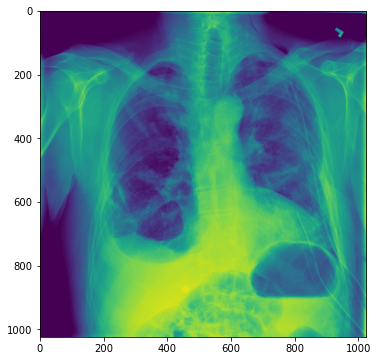

In [25]:
# Visualize the current image
plt.figure(figsize=(18, 6))
image = Image.open(test_image_path)
plt.imshow(image)
plt.show()